In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Thu Jul  2 19:44:12 2020


In [2]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os


%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
import torch
print(torch.__version__)

1.5.1


In [4]:
%autoreload 2  # Autoreload all modules

In [5]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Thu Jul  2 19:44:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   83C    P3    30W /  N/A |    460MiB /  8111MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
# def showsysteminfo():
#     from psutil import virtual_memory
#     ram_gb = virtual_memory().total / 1e9
#     ram_gb_avail = virtual_memory().available / 1e9
#     ram_gb_used = virtual_memory().active / 1e9
#     print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
#     print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
#     print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
# showsysteminfo()

In [7]:
import torch
print(torch.__version__)

1.5.1


In [8]:
helper = MonocularHelper()
final_output = r'//media/abhijit/Windows/MonocularDS/OverLayedImages'
final_output_mask = r'//media/abhijit/Windows/MonocularDS/OverLayedMask'
final_output_dm = r'/media/abhijit/Windows/MonocularDS/OverLayedDepthMasks'
bg_path = r'/media/abhijit/Windows/MonocularDS/Background'

# final_output = r'/content/MonocularDS/OverLayedImages'
# final_output_mask = r'/content/MonocularDS/OverLayedMask'
# final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks'
# bg_path = r'/home/abhijit/EVARepo/MonocularDS/Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


In [9]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

from src.dataset import MonocularDataset

print(len(train_label))
print(len(test_label))
torch.backends.cudnn.benchmark = True

batch_size = 64

# !ulimit
# !ulimit -n 500000
# !ulimit

monocular_ds_tr = MonocularDataset(images=train_data, labels=train_label, ds_type="train", preload=False)
monocular_ds_ts = MonocularDataset(images=test_data, labels=test_label, ds_type="test", preload=True)
image_size= 32
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds_tr.set_transforms(train_transforms)
monocular_ds_ts.set_transforms(test_transforms)

# ds = dst.Dataset()

# train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
#                                                train_transforms=train_transforms)

# test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
#                                              test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=monocular_ds_tr, testdataset=monocular_ds_ts, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
64


  0%|          | 390/120000 [00:00<00:30, 3895.69it/s]


Preloading masks from test dataset...


  1%|          | 623/120000 [00:00<00:19, 6228.57it/s]


Preloading bg from test dataset...

Preloading bg_fg from test dataset...


100%|██████████| 120000/120000 [00:18<00:00, 6532.48it/s]

4375
1875
cuda
Selected optimization level O2:  FP16 training with FP32 batchnorm and FP32 master weights.

Defaults for this optimization level are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic
3


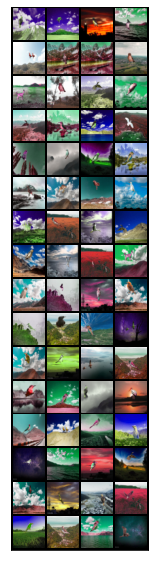

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 64, 64]              27
            Conv2d-2           [-1, 64, 64, 64]             256
DepthwiseSeparableConv2d-3           [-1, 64, 64, 64]               0
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]             576
            Conv2d-6          [-1, 128, 64, 64]           8,320
DepthwiseSeparableConv2d-7          [-1, 128, 64, 64]               0
              ReLU-8          [-1, 128, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]           1,152
           Conv2d-10          [-1, 128, 64, 64]          16,512
DepthwiseSeparableConv2d-11          [-1, 128, 64, 64]               0
      BatchNorm2d-12          [-1, 128, 64, 64]             256
           Conv2d-13          [-1, 128, 64, 64]           1,152
           Conv2d-14

In [10]:
print(len(train_loader))
print(len(test_loader))

# !ulimit -n

import torch.nn as nn
from apex import amp
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createMonocularModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

for name, param in cnn_model.named_parameters():    
    if "bn1" in name or "bn2" in name:
        nn.init.constant_(param, 0)        
    elif "weight" in name:
        nn.init.kaiming_normal_(param, mode="fan_out", nonlinearity="relu")
    elif "bias" in name:
        nn.init.constant_(param, 0)

# last_epoch = 1
# path = "/home/abhijit/Downloads/finalmodelwithdata-Mask-224k.pt"
# if os.path.exists(path):
#     checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
#         , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel(path)
#     cnn_model.load_state_dict(model_state_dict)
#     # optimizer.load_state_dict(optimizer_state_dict)
#     last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)

cnn_model, optimizer = amp.initialize(cnn_model, optimizer, opt_level="O2")
sample = next(iter(train_loader))

print(len(sample[0]))
imgs = sample[0][0]
utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][1]
# utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][2]
# utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][3]
# utils.Utils.show(imgs, nrow=4)
# # grid_tensor = torchvision.utils.make_grid(imgs, 2)
# grid_image = grid_tensor.permute(1, 2, 0)

# utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()
# print(cnn_model)
# print(cnn_model.parameters())

# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=1, 
            verbose=True, threshold=0.01, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 10

train_model.showmodelsummary(model=cnn_model,input_size=[(4,3,64,64)])
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(cnn_model))

In [ ]:
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    #tr_out,
    train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

#     Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(dice_loss)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/4375 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 3/4375 [00:00<42:19,  1.72it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Train Epoch: 1 [0/280000 (0%)]	Loss: 0.927547
IOU : 0.031005185920776786


  1%|          | 23/4375 [00:02<07:32,  9.61it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


 11%|█▏        | 502/4375 [01:04<09:34,  6.74it/s]

Train Epoch: 1 [1500/280000 (11%)]	Loss: 0.458587
IOU : 0.3161373760597787


 23%|██▎       | 1002/4375 [02:26<08:21,  6.73it/s]

Train Epoch: 1 [3000/280000 (23%)]	Loss: 0.347298
IOU : 0.39215686274509803


 34%|███▍      | 1502/4375 [03:49<07:11,  6.66it/s]

Train Epoch: 1 [4500/280000 (34%)]	Loss: 0.323233
IOU : 0.4


 46%|████▌     | 2003/4375 [05:11<06:47,  5.82it/s]

Train Epoch: 1 [6000/280000 (46%)]	Loss: 0.292442
IOU : 0.45650896267998825


 57%|█████▋    | 2503/4375 [06:35<04:33,  6.85it/s]

Train Epoch: 1 [7500/280000 (57%)]	Loss: 0.256410
IOU : 0.44908651262761956


 69%|██████▊   | 3003/4375 [07:57<03:18,  6.90it/s]

Train Epoch: 1 [9000/280000 (69%)]	Loss: 0.243339
IOU : 0.4661842471472307


 80%|████████  | 3503/4375 [09:18<02:10,  6.66it/s]

Train Epoch: 1 [10500/280000 (80%)]	Loss: 0.235944
IOU : 0.5183344526527871


 91%|█████████▏| 4003/4375 [10:40<00:53,  6.94it/s]

Train Epoch: 1 [12000/280000 (91%)]	Loss: 0.237603
IOU : 0.4886561954624782


 94%|█████████▍| 4104/4375 [10:56<00:38,  6.99it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0


  0%|          | 0/1875 [00:00<?, ?it/s]

Batch IOU = 0.006765438113597451


  0%|          | 1/1875 [00:04<2:22:31,  4.56s/it]

Test Epoch: 1 [0/120000 (0%)]	Loss: 0.462205
IOU : 0.2661762383995977


 27%|██▋       | 501/1875 [16:14<43:38,  1.91s/it]  

Test Epoch: 1 [1500/120000 (27%)]	Loss: 0.470107
IOU : 0.2551767635641125


 53%|█████▎    | 1001/1875 [32:11<27:41,  1.90s/it]

Test Epoch: 1 [3000/120000 (53%)]	Loss: 0.548496
IOU : 0.22043254753199007


 65%|██████▍   | 1211/1875 [38:51<21:27,  1.94s/it]

In [ ]:
image_size= 64
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds_tr.set_transforms(train_transforms)
monocular_ds_ts.set_transforms(test_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou  = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-64K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
image_size= 96
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou =train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [17]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-96K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
image_size= 128
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou =train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [19]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-128K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
epochs=3
image_size= 160
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-160K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
image_size= 192
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-192k.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-224k.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)